In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
# dataset real: https://openreview.net/forum?id=QVeMBoRXAo_
# https://zenodo.org/records/5166987
# Cropped to the size 768x768, not resized
# Link: https://drive.google.com/drive/folders/1e08JqlfoxWK1_uiyqGPLadsfsaKP5Jbd?usp=share_link

# fake dataset: Stable diffusion 2, prompt : "churches from outside", size 768x768
# Link: https://drive.google.com/drive/folders/1d6TWa5hL2SKjSQszODCR6uBS_6de1H-7?usp=share_link

In [25]:
# The results for the datasets above, using code : https://github.com/rezashkv/gen-image-detector/blob/main/gradient/grad_metric.py
# results in file: https://drive.google.com/drive/folders/1Arnq38xHdC38NYga9Isk9nyB_03Lsv_P?usp=share_link
path_1 = '/content/drive/MyDrive/CMSC673/Final_presentation/Data/result_data_768_churchesWikipedia_vs_generated_by_Zuzanna'
results_dataset = []
for name in os.listdir(path_1):
  results_dataset.append(name)

In [5]:
i = 0
for i, file_csv in enumerate(results_dataset):
  df1 = pd.read_csv(path_1 + '/' + file_csv)
  new_col_name = file_csv[0:4] + file_csv[8:-4]
  df1 = df1.rename(columns={"errors": new_col_name})
  if i == 0:
    df = df1
  else:
    df = df1.join(df)

In [6]:
df

,fake_5,fake_20,fake_25,fake_50,fake_75,fake_100,fake_200,real_5,real_20,real_25,real_50,real_75,real_100,real_200
0,22023.884766,29633.156250,31880.314453,39743.335938,46373.644531,51904.527344,70895.156250,14093.513672,16162.430664,16916.642578,19376.984375,21071.832031,23136.746094,29857.503906
1,11759.515625,11641.712891,11973.742188,15100.525391,17965.492188,19192.525391,27347.925781,37244.984375,36378.550781,37579.761719,41617.765625,45322.609375,48257.359375,59762.230469
2,25686.263672,32144.484375,34310.917969,45334.144531,53595.003906,58387.652344,84770.734375,21614.302734,21857.093750,22406.960938,25696.511719,27316.878906,30477.962891,37666.792969
3,17265.861328,19518.421875,20209.595703,25671.572266,29400.962891,33262.949219,49050.406250,20932.798828,19839.679688,19887.492188,22611.460938,24575.812500,26648.175781,33110.015625
4,29294.613281,32522.427734,34074.308594,41456.277344,46241.468750,51042.453125,67415.031250,9796.308594,9597.942383,10064.275391,11836.869141,13572.291016,15093.188477,20676.917969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,18379.025391,22313.433594,23828.398438,32081.966797,36234.050781,42317.179688,58266.414062,48563.023438,47311.015625,48801.304688,51657.199219,53662.460938,57014.671875,65745.304688
396,18259.207031,21444.257812,22326.671875,28358.265625,31794.267578,35840.781250,49906.308594,9239.476562,8837.919922,9211.587891,10793.574219,12013.707031,13145.811523,17284.472656
397,12463.584961,13269.472656,13959.789062,17714.230469,20894.644531,23338.156250,33168.988281,40869.437500,39529.601562,40563.640625,45919.320312,50862.128906,53315.242188,68853.140625
398,14655.457031,16217.283203,17147.617188,22796.628906,26079.339844,30015.048828,43330.164062,18649.509766,19340.453125,19980.378906,23129.720703,25292.484375,28120.671875,35293.101562


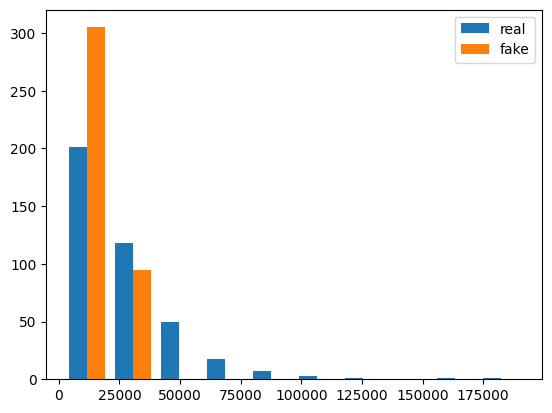

In [7]:
plt.hist([df['real_5'], df['fake_5']])

plt.legend(['real', 'fake'])
plt.show()

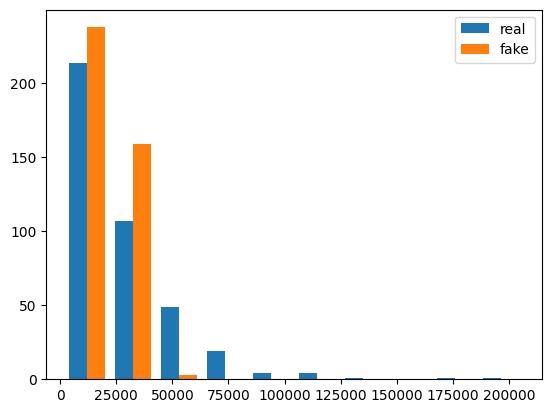

In [8]:
plt.hist([df['real_25'], df['fake_25']])

plt.legend(['real', 'fake'])
plt.show()

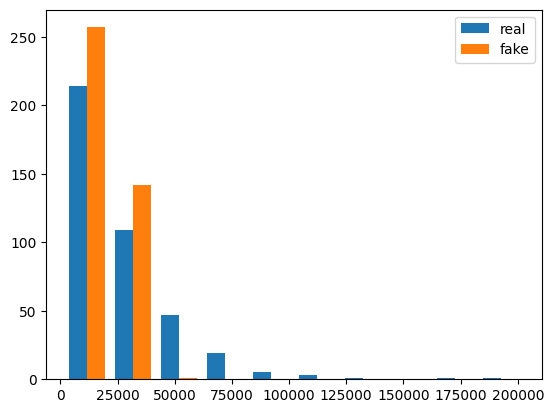

In [9]:
plt.hist([df['real_20'], df['fake_20']])

plt.legend(['real', 'fake'])
plt.show()

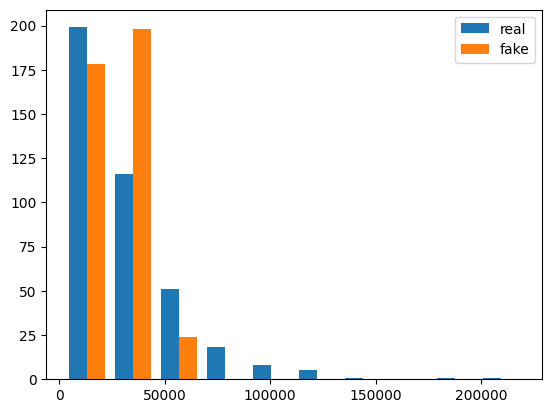

In [10]:
plt.hist([df['real_50'], df['fake_50']])

plt.legend(['real', 'fake'])
plt.show()

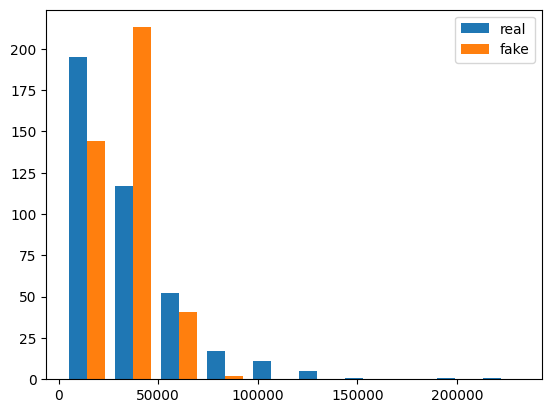

In [11]:
plt.hist([df['real_75'], df['fake_75']])

plt.legend(['real', 'fake'])
plt.show()

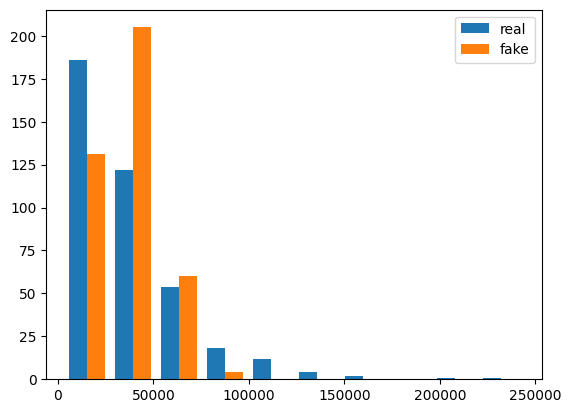

In [12]:
plt.hist([df['real_100'], df['fake_100']])

plt.legend(['real', 'fake'])
plt.show()

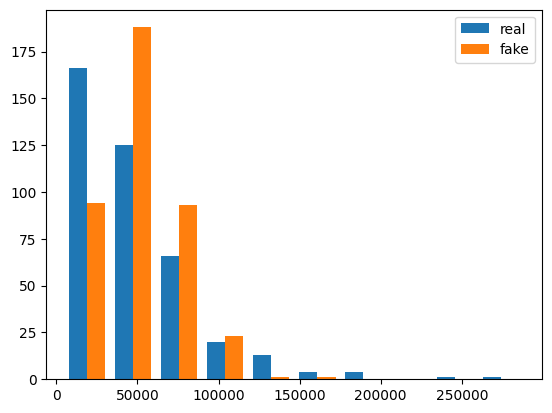

In [13]:
plt.hist([df['real_200'], df['fake_200']])

plt.legend(['real', 'fake'])
plt.show()

In [14]:
## Hard to see anything on the graphs. Next we compare the ratio of L2_error_step_1 / L2_error_step_2

In [15]:
def hypothesis_df (number_1, number_2, df, hypothesis_number):
  df_f = df[[f'fake_{number_1}', f'fake_{number_2}']].copy()
  df_r = df[[f'real_{number_1}', f'real_{number_2}']].copy()
  df_f['actual'] = 1
  df_r['actual'] = 0
  df_f['prediction'] = 0
  df_r['prediction'] = 0
  df_f.loc[df_f[f'fake_{number_1}'] / df_f[f'fake_{number_2}']  <= hypothesis_number, 'prediction'] = 1
  df_r.loc[df_r[f'real_{number_1}'] / df_r[f'real_{number_2}']  <= hypothesis_number, 'prediction'] = 1
  df_hypothesis = pd.concat([df_f, df_r])
  return df_hypothesis

In [16]:
def cf_matrix(number_1, number_2, rate, df):
  df_hypothesis = hypothesis_df (number_1, number_2, df, rate)
  y_test = df_hypothesis['actual']
  y_pred = df_hypothesis['prediction']

  cf_matrix = confusion_matrix(y_test, y_pred)
  sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
  plt.title(f'Confusion Matrix for threshold {rate}')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show(block=False)

In [17]:
def roc_graph(number_1, number_2, df):
  #roc
  errors_fake = list(df[f'fake_{number_1}'] / df[f'fake_{number_2}'])
  errors_real =  list(df[f'real_{number_1}'] / df[f'real_{number_2}'])
  preds =  errors_fake + errors_real
  preds = [1 - pred for pred in preds]

  t_labels = [1] * len(errors_fake) + [0] * len(errors_real)

  fpr, tpr, thresholds = metrics.roc_curve(t_labels, preds)
  auc = metrics.auc(fpr, tpr)
  acc = np.max(1 - (fpr + (1 - tpr))/2)
  roc_auc = metrics.auc(fpr, tpr)

  err = .01
  low = tpr[np.where(fpr<.01)[0][-1]]

  print(low)
  # method I: plt
  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.02f' % roc_auc)
  plt.plot(low, err, 'b', label = 'FPR@TPR < 0.01 = %0.02f' % low)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

5 20
0.7725


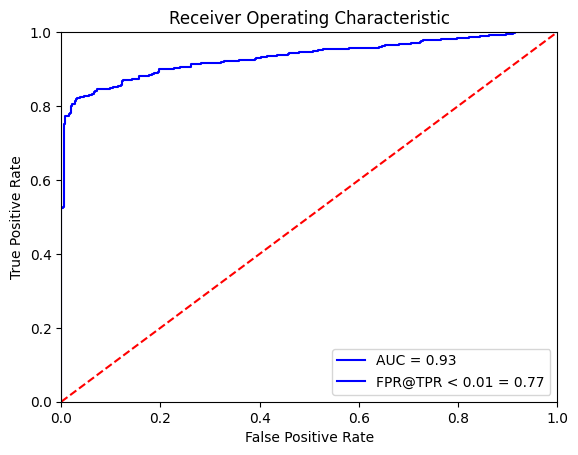

5 25
0.735


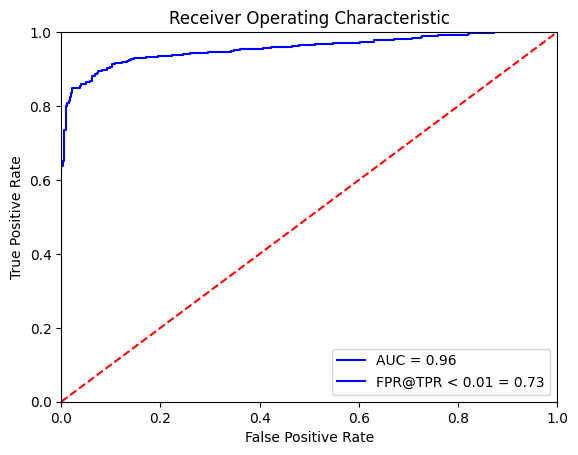

5 50
0.7775


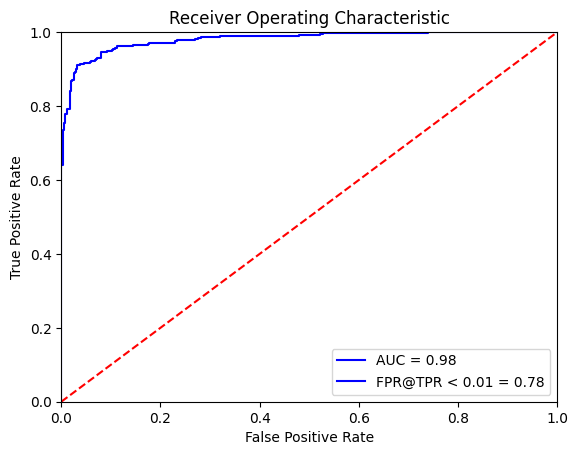

5 75
0.69


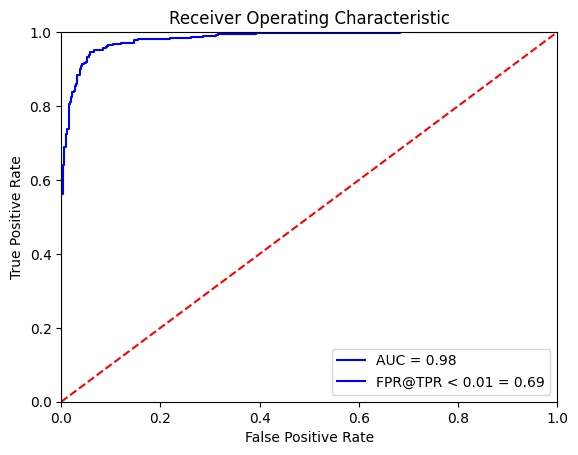

5 100
0.6475


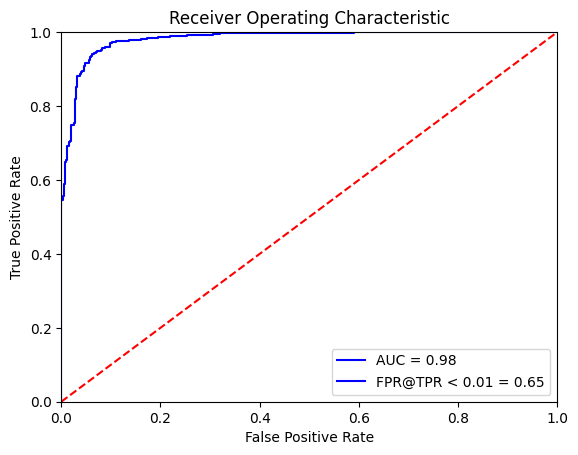

20 25
0.2925


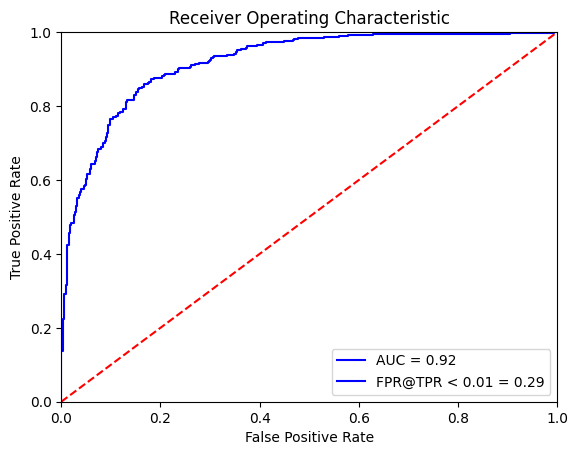

20 50
0.1975


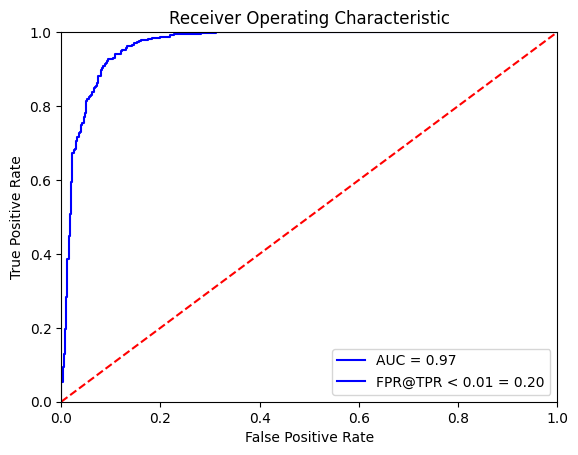

20 75
0.195


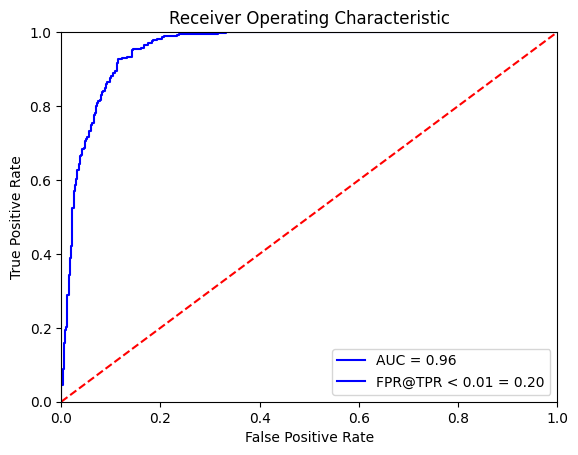

20 100
0.135


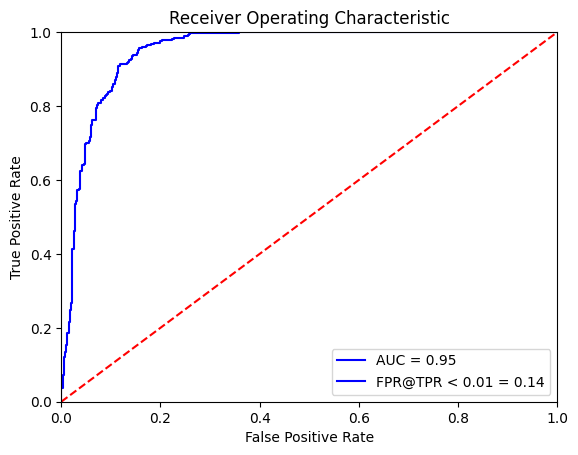

25 50
0.15


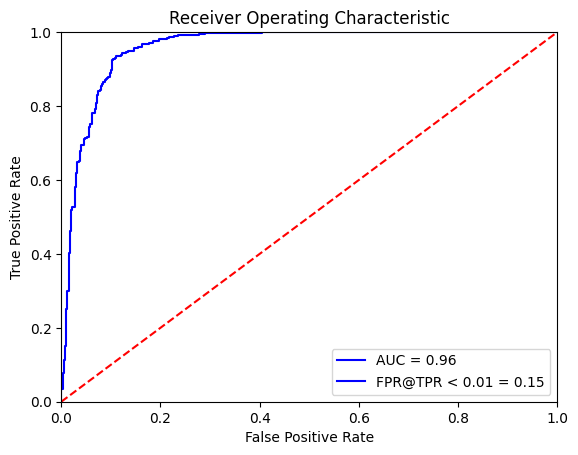

25 75
0.1925


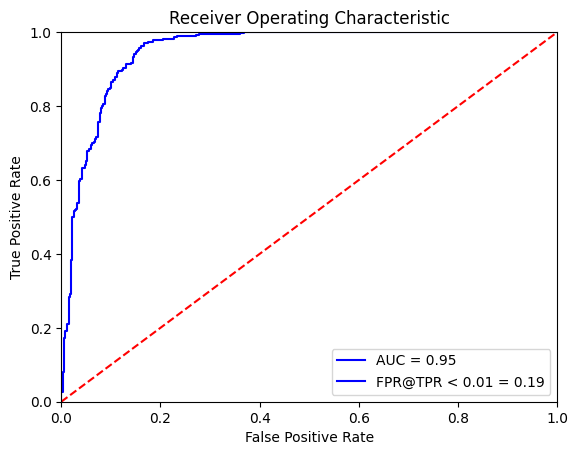

25 100
0.1175


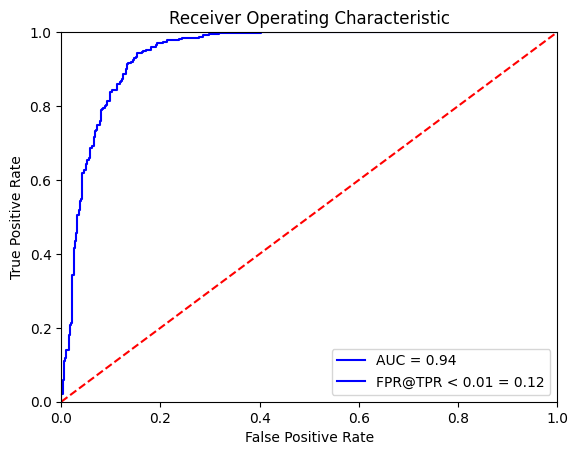

50 75
0.03


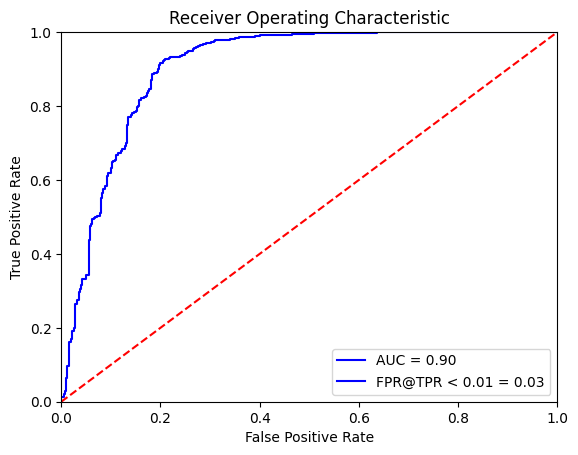

50 100
0.055


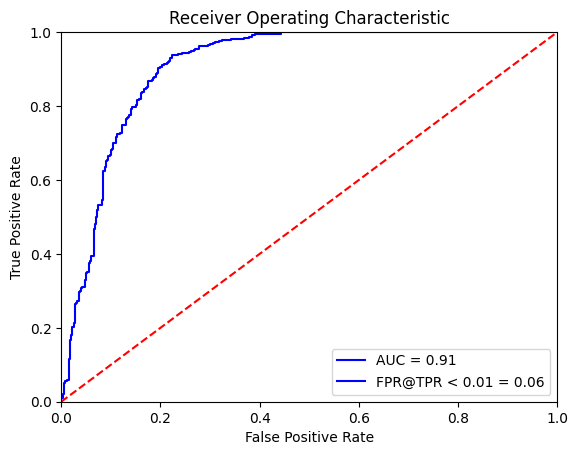

75 100
0.0425


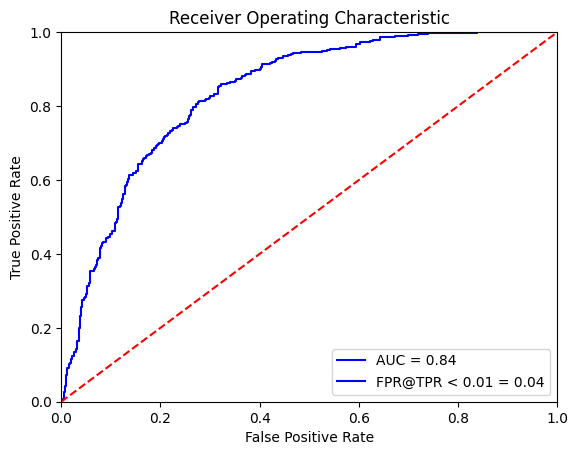

In [18]:
for i in [5,20,25,50,75,100]:
  for j in [20,25,50,75,100]:
    if i < j:
      print(i , j)
      roc_graph(i, j, df)


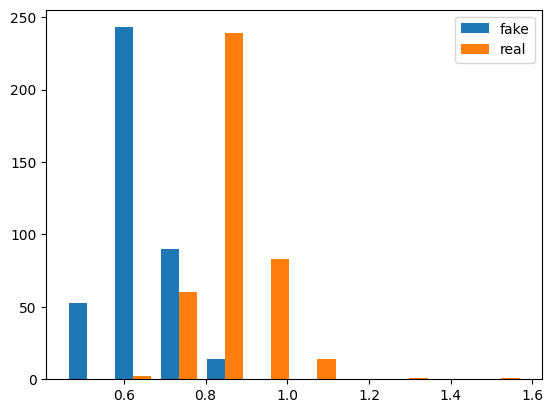

In [19]:
plt.hist([df['fake_5'] / df['fake_50'], df['real_5'] / df['real_50']])

plt.legend(['fake', 'real'])
plt.show()

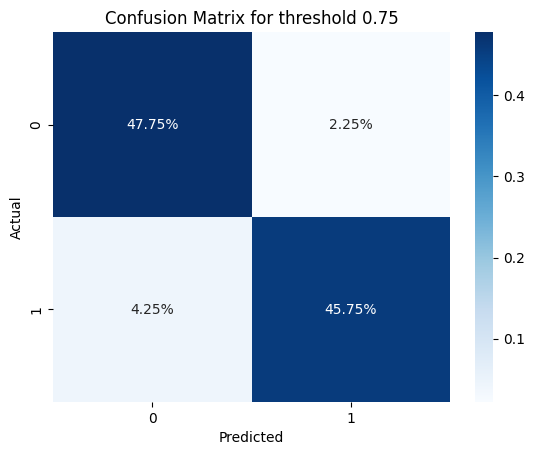

In [20]:
cf_matrix(5, 50, 0.75, df)

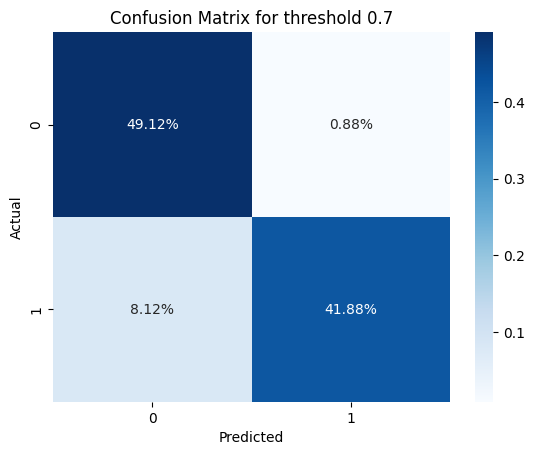

In [21]:
cf_matrix(5, 50, 0.7, df)

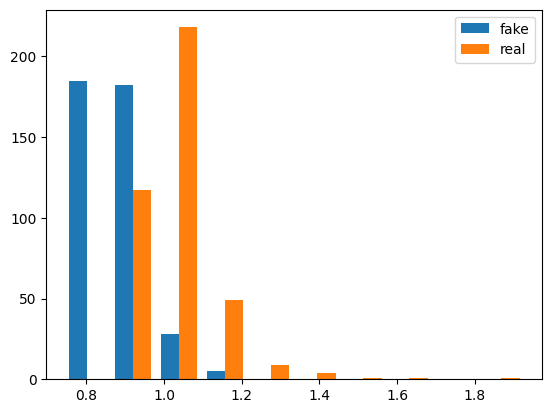

In [22]:
plt.hist([df['fake_5'] / df['fake_20'], df['real_5'] / df['real_20']])

plt.legend(['fake', 'real'])
plt.show()

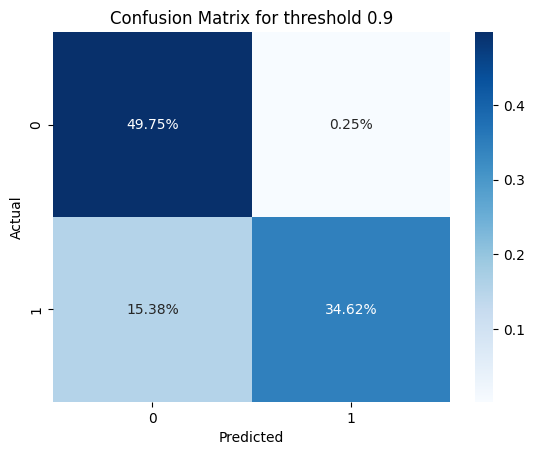

In [23]:
cf_matrix(5, 20, 0.9, df)

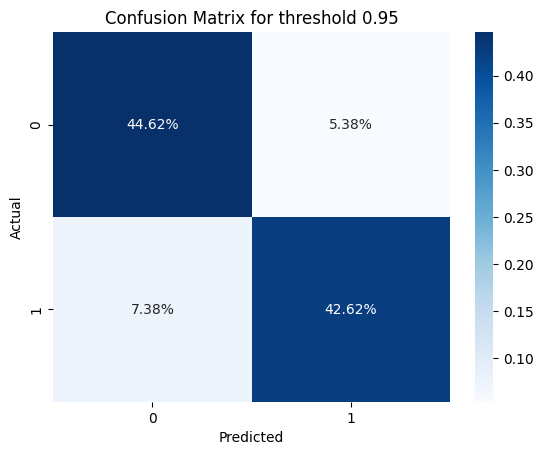

In [24]:
cf_matrix(5, 20, 0.95, df)